In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Train = pd.read_csv('Data/train.csv')
Test  = pd.read_csv('Data/test.csv')

In [3]:
Train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h1>Exploratory Data Analysis </h1>

In [4]:
Train.shape

(1460, 81)

<li>Dataset is having 1460 observersations and 81 columns</li>


<h4> Target Column Analysis</h4>

In [5]:
Train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

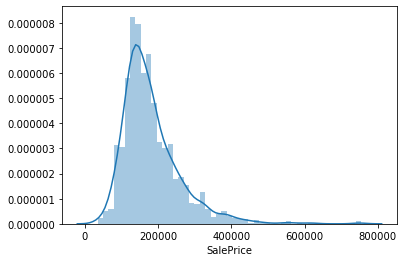

In [6]:
sns.distplot(Train['SalePrice'])

How Target variable is related with other columns

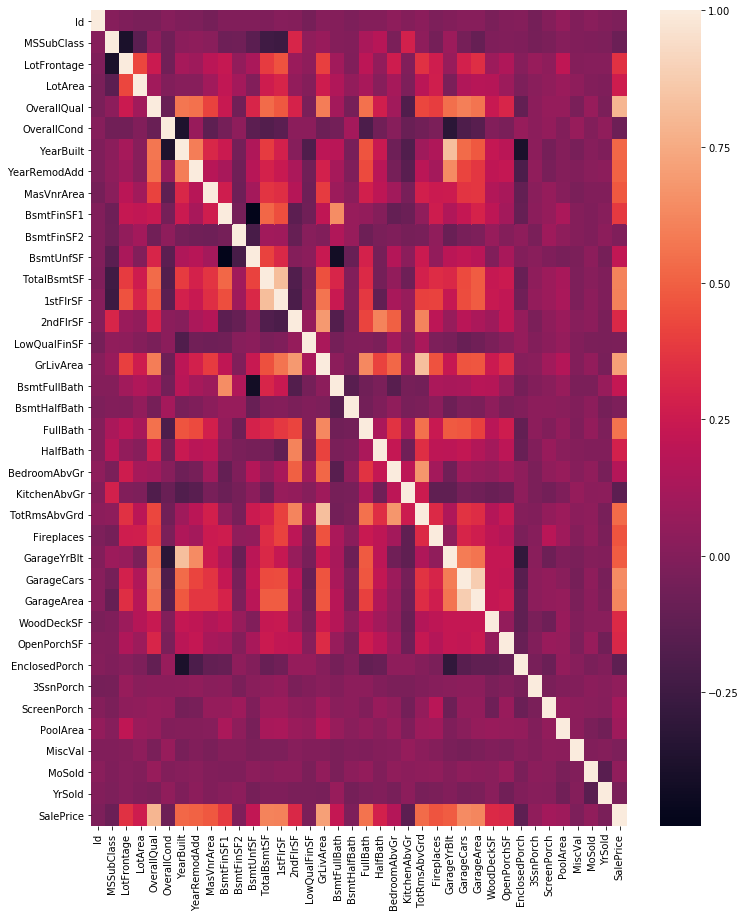

In [7]:
plt.subplots(figsize=(12,15))
sns.heatmap(Train.corr())

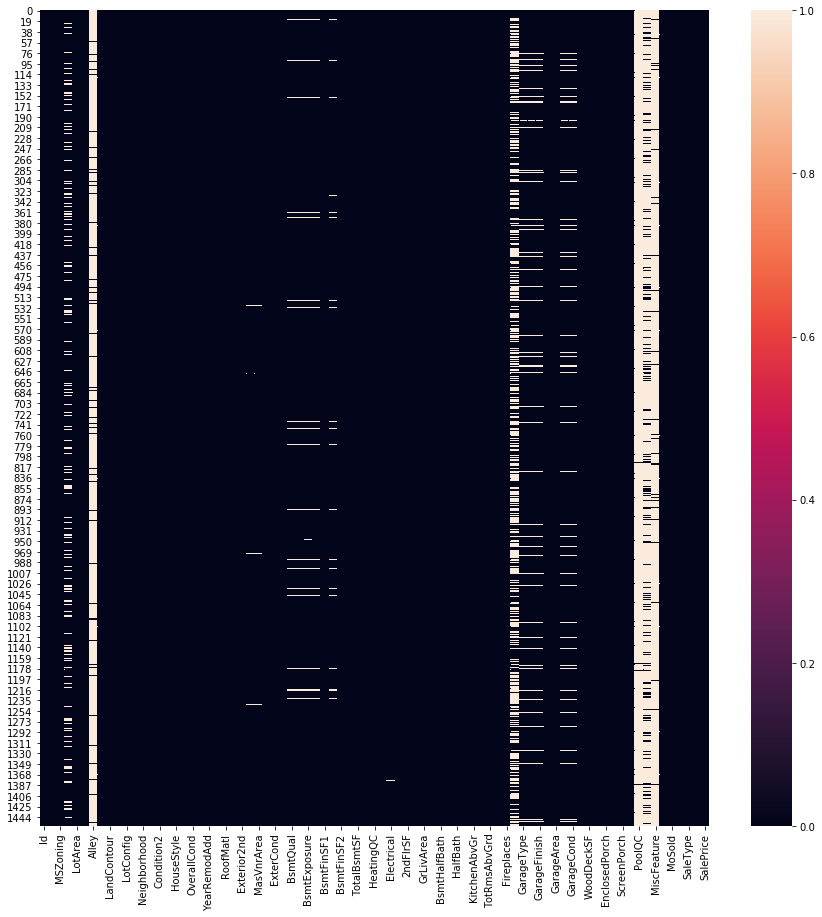

In [8]:
plt.subplots(figsize=(15,15))
sns.heatmap(Train.isnull())

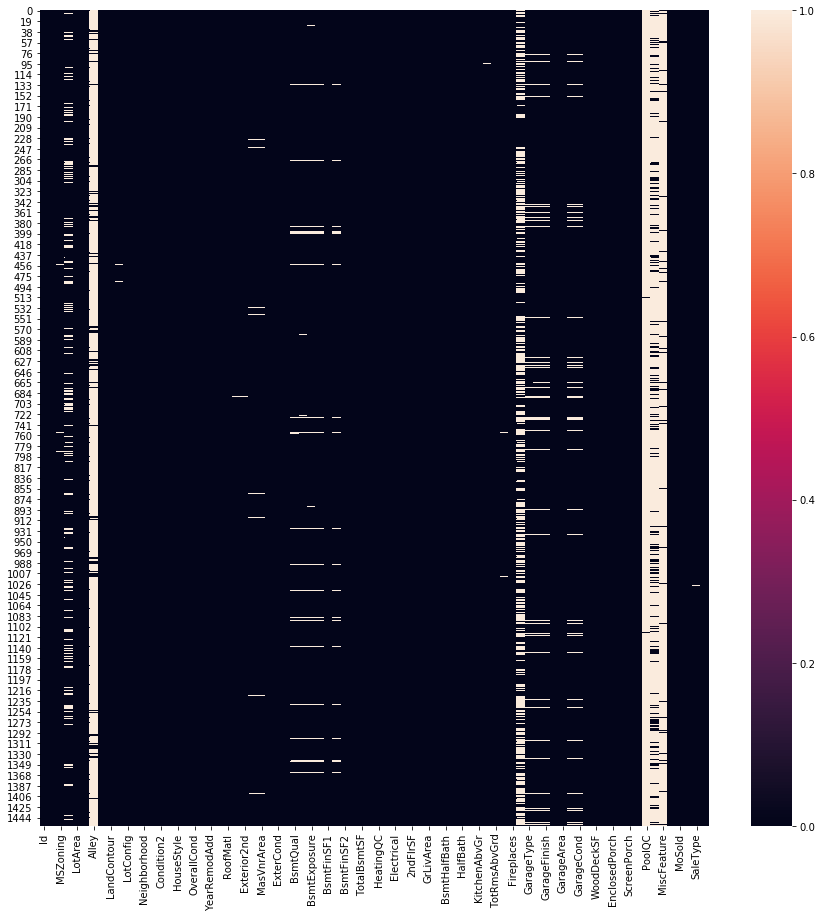

In [9]:
plt.subplots(figsize=(15,15))
sns.heatmap(Test.isnull())

In [10]:
# dropping column which are having high null values
Train=Train.drop(['Alley','FireplaceQu', 'PoolQC', 'Fence' , 'MiscFeature'],axis=1)
Test=Test.drop(['Alley','FireplaceQu', 'PoolQC', 'Fence' , 'MiscFeature'],axis=1)

Handling Missing Values

In [11]:
missing_values_train = Train.isnull().sum()
pd.set_option('display.max_rows', len(missing_values_train ))
missing_values_train

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [12]:
# filling missing values
Train['LotFrontage']=Train['LotFrontage'].fillna(Train['LotFrontage'].mean())

In [13]:
Train['BsmtQual']=Train['BsmtQual'].replace(np.nan,None).fillna(Train['BsmtQual'].mode())

In [14]:
Train['BsmtCond']=Train['BsmtCond'].replace(np.nan,None).fillna(Train['BsmtCond'].mode())

In [15]:
Train['BsmtExposure']=Train['BsmtExposure'].replace(np.nan,None).fillna(Train['BsmtExposure'].mode())

In [16]:
Train['BsmtFinType1']=Train['BsmtFinType1'].replace(np.nan,None).fillna(Train['BsmtFinType1'].mode())

In [17]:
Train['BsmtFinType2']=Train['BsmtFinType2'].replace(np.nan,None).fillna(Train['BsmtFinType2'].mode())

In [18]:
Train['Electrical']=Train['Electrical'].replace(np.nan,None).fillna(Train['Electrical'].mode())

In [19]:
Train['GarageType']=Train['GarageType'].replace(np.nan,None).fillna(Train['GarageType'].mode())

In [20]:
Train['GarageYrBlt']=Train['GarageYrBlt'].replace(np.nan,None).fillna(Train['YearBuilt'])

In [21]:
Train['GarageFinish']=Train['GarageFinish'].replace(np.nan,None).fillna(Train['GarageFinish'].mode())

In [22]:
Train['GarageQual']=Train['GarageQual'].replace(np.nan,None).fillna(Train['GarageQual'].mode())
Train['GarageCond']=Train['GarageCond'].replace(np.nan,None).fillna(Train['GarageCond'].mode())

In [23]:
Train['MasVnrType'] = Train['MasVnrType'].replace(np.nan,None).fillna(Train['MasVnrType'].mode())

In [24]:
Train['MasVnrArea'] = Train['MasVnrArea'].replace(np.nan,None).fillna(Train['MasVnrArea'].mean())

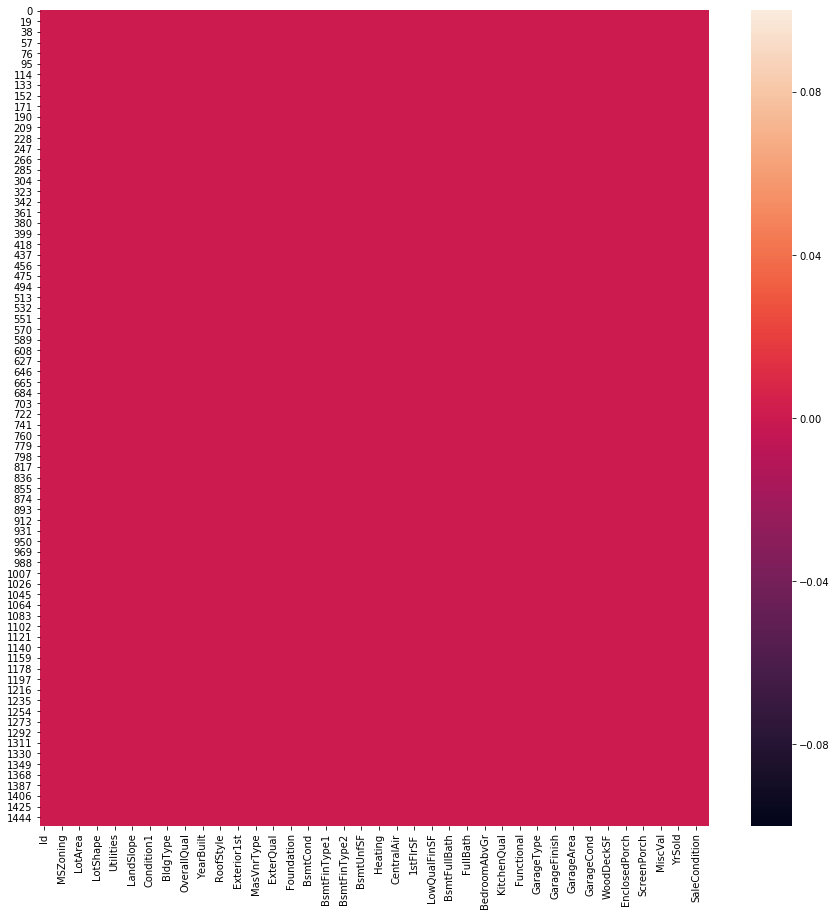

In [25]:
plt.subplots(figsize=(15,15))
sns.heatmap(Train.isnull())

In [79]:
missing_values_test = Test.isnull().sum()
pd.set_option('display.max_rows', len(missing_values_test ))
missing_values_test

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [27]:
Test['LotFrontage']=Test['LotFrontage'].fillna(Test['LotFrontage'].mean())

In [28]:
Test['MSZoning']=Test['MSZoning'].replace(np.nan,None).fillna(Test['MSZoning'].mode())

In [29]:
Test['Utilities']=Test['Utilities'].replace(np.nan, None).fillna(Test['Utilities'].mode())

In [30]:
Test['Exterior1st']=Test['Exterior1st'].replace(np.nan, None).fillna(Test['Exterior1st'].mode())

In [31]:
Test['Exterior2nd']=Test['Exterior2nd'].replace(np.nan, None).fillna(Test['Exterior2nd'].mode())

In [32]:
Test['MasVnrType'] = Test['MasVnrType'].replace(np.nan,None).fillna(Test['MasVnrType'].mode())
Test['MasVnrArea'] = Test['MasVnrArea'].replace(np.nan,None).fillna(Test['MasVnrArea'].mean())

In [33]:
Test['BsmtQual']=Test['BsmtQual'].replace(np.nan,None).fillna(Test['BsmtQual'].mode())
Test['BsmtCond']=Test['BsmtCond'].replace(np.nan,None).fillna(Test['BsmtCond'].mode())
Test['BsmtExposure']=Test['BsmtExposure'].replace(np.nan,None).fillna(Test['BsmtExposure'].mode())
Test['BsmtFinType1']=Test['BsmtFinType1'].replace(np.nan,None).fillna(Test['BsmtFinType1'].mode())
Test['BsmtFinType2']=Test['BsmtFinType2'].replace(np.nan,None).fillna(Test['BsmtFinType2'].mode())

In [36]:
Test['BsmtFinSF1']=Test['BsmtFinSF1'].replace(np.nan,None).fillna(Test['BsmtFinSF1'].mean())
Test['BsmtUnfSF']=Test['BsmtUnfSF'].replace(np.nan,None).fillna(Test['BsmtUnfSF'].mean())

In [41]:
Test['BsmtFinSF2']=Test['BsmtFinSF2'].replace(np.nan,None).fillna(Test['BsmtFinSF2'].mean())

In [43]:
Test['TotalBsmtSF']=Test['TotalBsmtSF'].replace(np.nan,None).fillna(Test['TotalBsmtSF'].mean())

In [45]:
Test['TotalBsmtSF']=Test['TotalBsmtSF'].replace(np.nan,None).fillna(Test['TotalBsmtSF'].mean())

In [52]:
Test['KitchenQual']=Test['KitchenQual'].replace(np.nan,None).fillna(Test['KitchenQual'].mode())

In [56]:
Test['Functional']=Test['Functional'].replace(np.nan,None).fillna(Test['Functional'].mode())

In [58]:
Test['GarageType']=Test['GarageType'].replace(np.nan,None).fillna(Test['GarageType'].mode())
Test['GarageYrBlt']=Test['GarageYrBlt'].replace(np.nan,None).fillna(Test['YearBuilt'])
Test['GarageFinish']=Test['GarageFinish'].replace(np.nan,None).fillna(Test['GarageFinish'].mode())
Test['GarageQual']=Test['GarageQual'].replace(np.nan,None).fillna(Test['GarageQual'].mode())
Test['GarageCond']=Test['GarageCond'].replace(np.nan,None).fillna(Test['GarageCond'].mode())

In [62]:
Test['GarageArea']=Test['GarageArea'].replace(np.nan,None).fillna(Test['GarageArea'].mean())

In [66]:
Test['SaleType']=Test['SaleType'].replace(np.nan,None).fillna(Test['SaleType'].mode())

In [76]:
Test['GarageCars']=Test['GarageCars'].replace(np.nan,None).fillna(Test['GarageCars'].mode())

In [77]:
Test['BsmtFullBath']=Test['BsmtFullBath'].replace(np.nan,None).fillna(Test['BsmtFullBath'].mode())

In [78]:
Test['BsmtHalfBath']=Test['BsmtHalfBath'].replace(np.nan,None).fillna(Test['BsmtHalfBath'].mode())

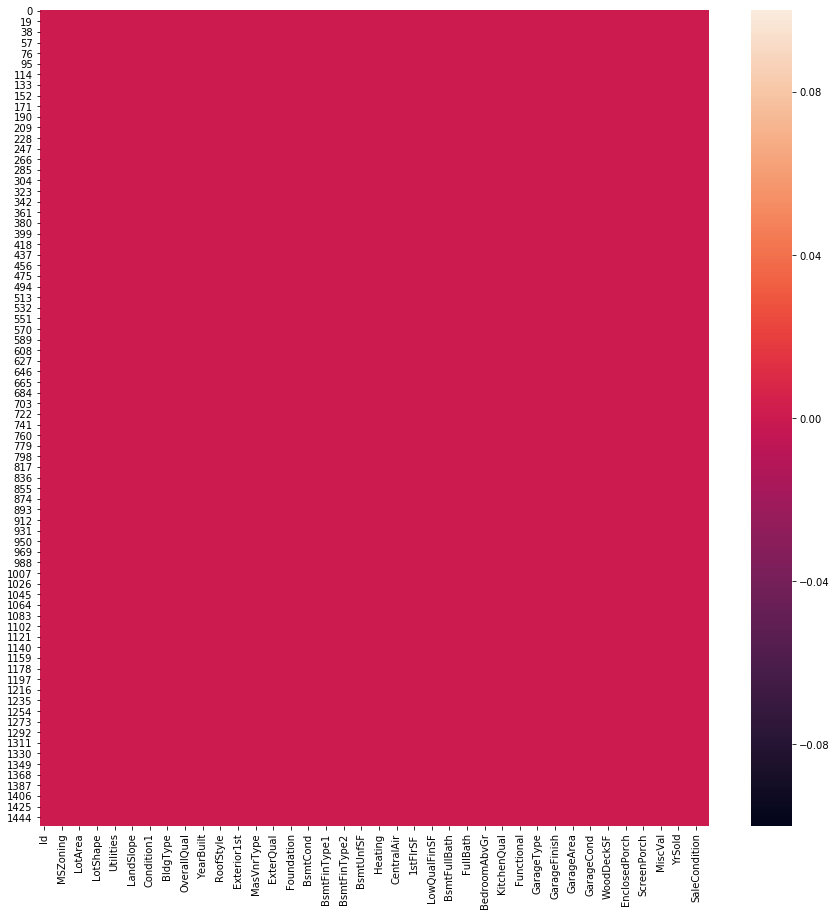

In [80]:
plt.subplots(figsize=(15,15))
sns.heatmap(Train.isnull())